# **Jamboree Education - Business Case Study**

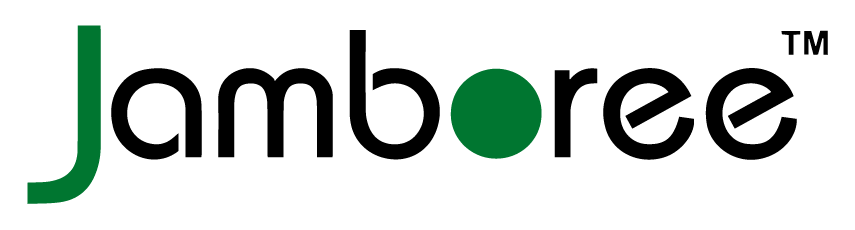

#**About**
- Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
- They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

#**Job:**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

#**Column Profiling:**

- Serial No.: This column represents the unique row identier for each applicant in the dataset.
- GRE Scores: This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
- TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.
- University Rating: This column indicates the rating or reputation of the university that the applicants are associated with.
  - The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
- SOP: This column represents the strength of the applicant's statement of purpose,rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
- LOR: This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
- CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.
- Research: This column indicates whether the applicant has research experience (1) or not (0).
- Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.


These columns provide relevant information about the applicants' academic qualications, test scores, university ratings, and other factors that may inuence their chances of admission.


In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge , ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr


In [355]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv" -O jambo.csv

--2024-12-12 15:10:34--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.71, 18.64.229.172, 18.64.229.91, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘jambo.csv’

jambo.csv           100%[===================>]  15.80K  --.-KB/s    in 0.001s  

2024-12-12 15:10:34 (28.7 MB/s) - ‘jambo.csv’ saved [16176/16176]



In [356]:
data = pd.read_csv("jambo.csv")

## Top 3 data

In [357]:
data.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


## Bottom 3 data

In [358]:
data.tail(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


# Shape of the dataset

In [359]:
data.shape # Dataset shape

(500, 9)

# EDA

#Dataset Info

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- Datatype

In [361]:
data.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


# Null Check

In [362]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


- No null values present in the dataset

# Duplicate Check

In [363]:
data.duplicated().sum()

0

- No Duplicate values present in the data set

# Unique Values

In [364]:
data.nunique()

,0
Serial No.,500
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


# Range Of Each Column

In [365]:
for i in data.columns:
  print(f"The range of Column {i} is from {data[i].min()} to {data[i].max()}")
  print("-"*80)

The range of Column Serial No. is from 1 to 500
--------------------------------------------------------------------------------
The range of Column GRE Score is from 290 to 340
--------------------------------------------------------------------------------
The range of Column TOEFL Score is from 92 to 120
--------------------------------------------------------------------------------
The range of Column University Rating is from 1 to 5
--------------------------------------------------------------------------------
The range of Column SOP is from 1.0 to 5.0
--------------------------------------------------------------------------------
The range of Column LOR  is from 1.0 to 5.0
--------------------------------------------------------------------------------
The range of Column CGPA is from 6.8 to 9.92
--------------------------------------------------------------------------------
The range of Column Research is from 0 to 1
---------------------------------------------------------

# Droping Unrequired Column

In [366]:
data = data.drop(columns="Serial No.")

- Droping "Serial No." column

# Unique Value Counts of each column

In [367]:
for i in data.columns:
  print(f"The Value Counts of column{i} = {data[i].value_counts()}")
  print("-"* 80)

The Value Counts of columnGRE Score = GRE Score
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: count, dtype: int64
--------------------------------------------------------------------------------
The Value Counts of columnTOEFL Score = TOEFL Score
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: count, 

# Statistical Summary

In [368]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


## **Insights :**

- GRE & TOEFL Scores: Average GRE score is 316.5, TOEFL score is 107.2, with most scores ranging from 290-340 (GRE) and 92-120 (TOEFL).
- University & Academic Performance: Average university rating is 3.1, and CGPA is 8.58, with most students performing well academically.
- SOP & LOR: SOP and LOR averages are 3.37 and 3.48, showing strong application materials.
- Research & Admission Chances: Most students lack research experience (average 0.56), but the average chance of admission is 0.72, indicating moderate to high chances overall.

#Visualization Analysis

#Univariate Analysis

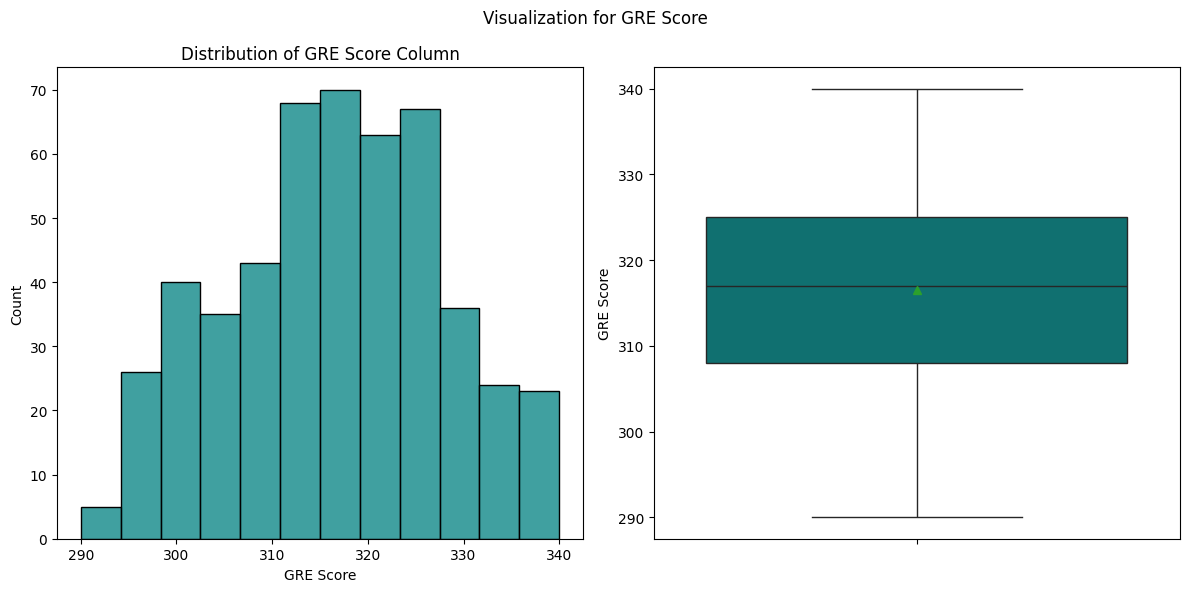

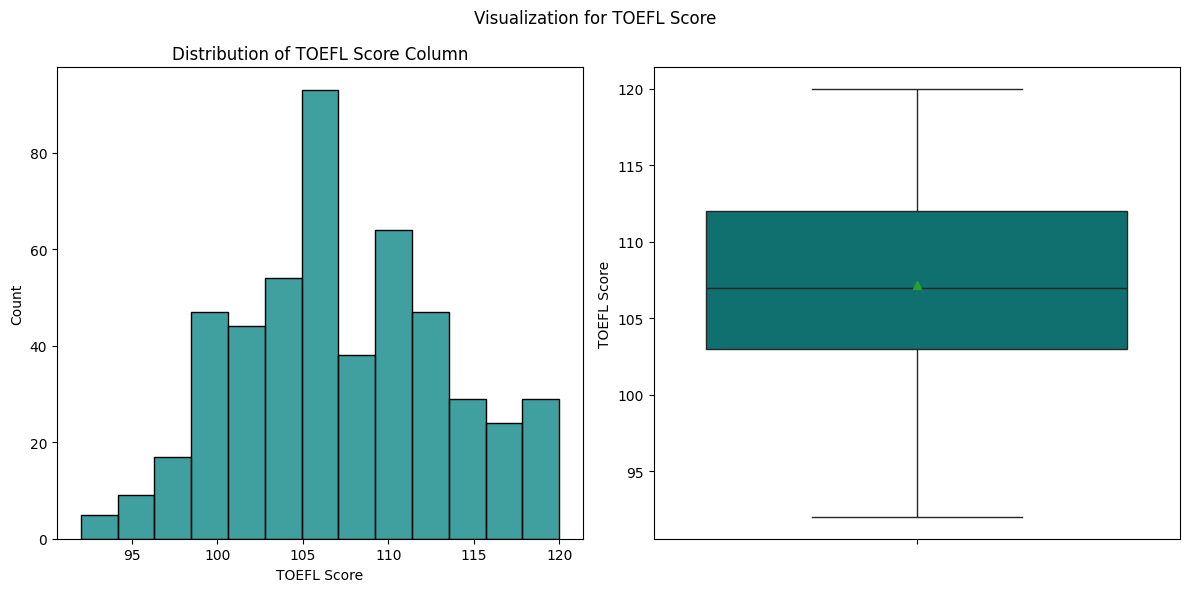

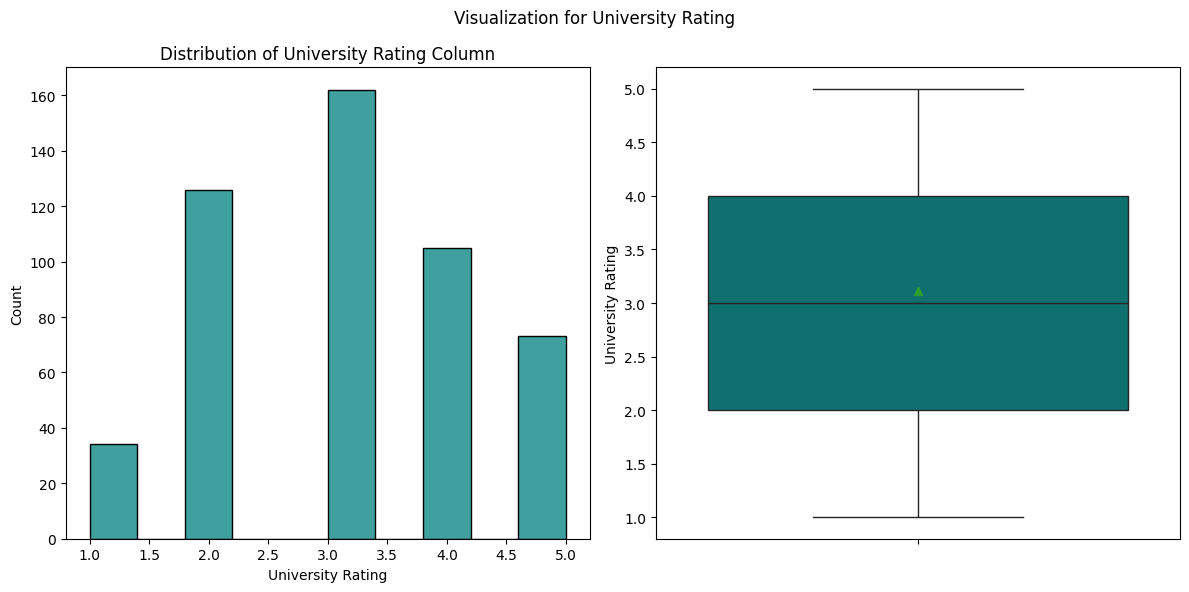

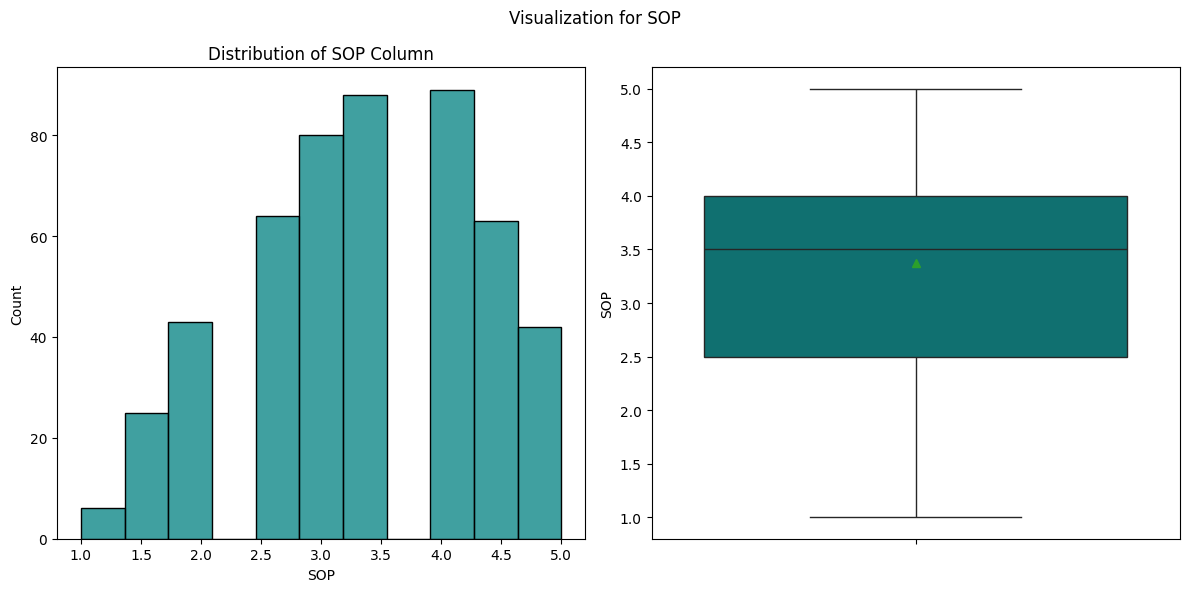

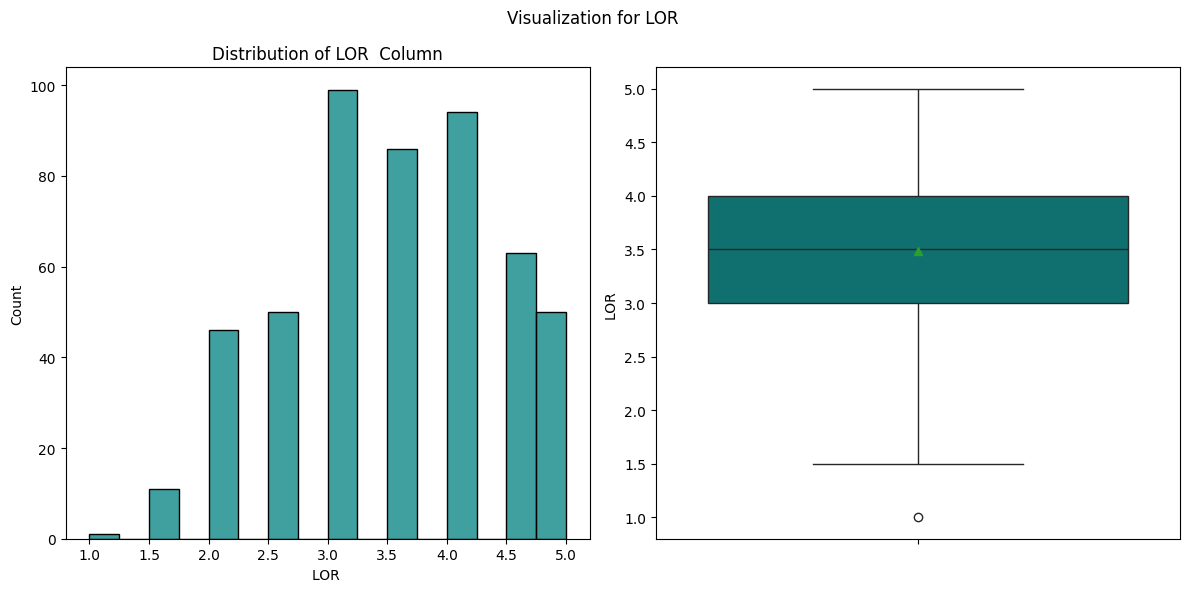

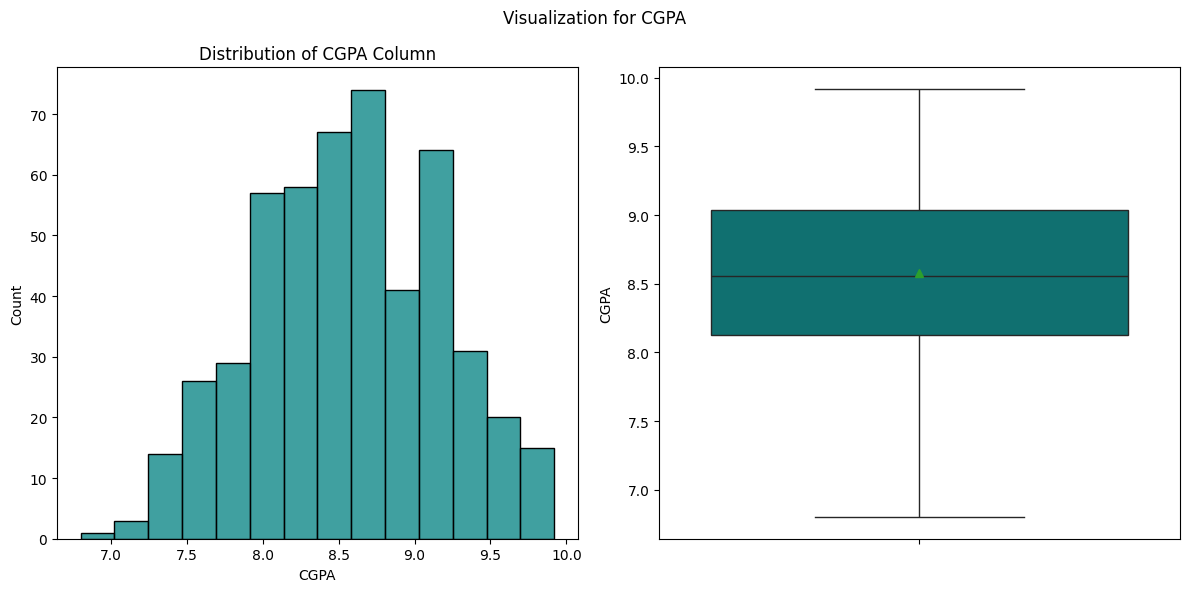

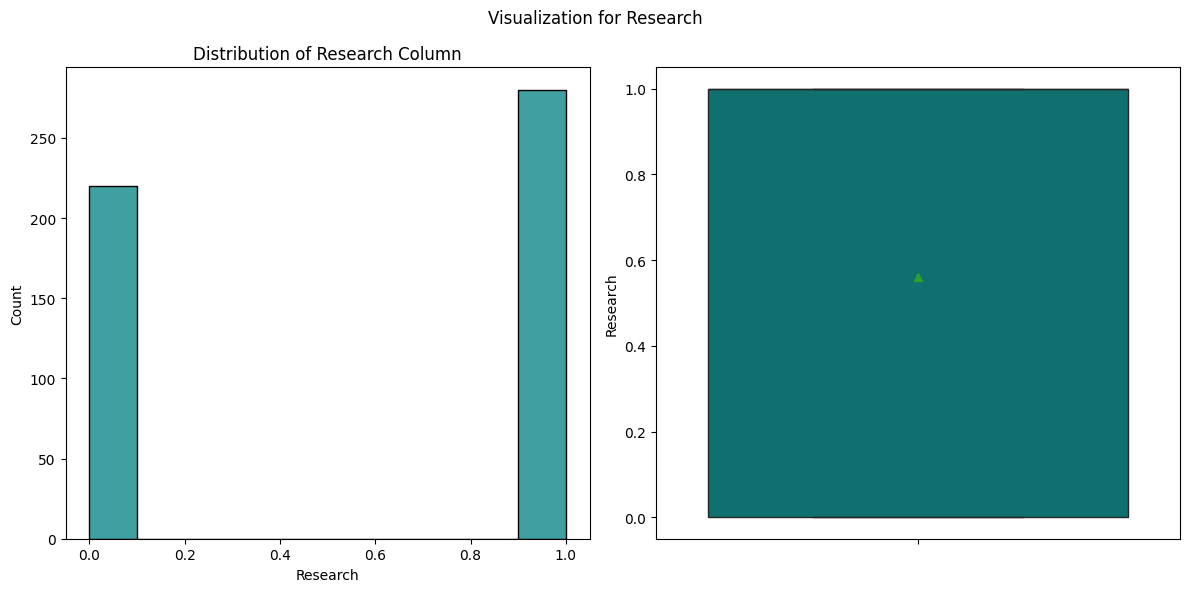

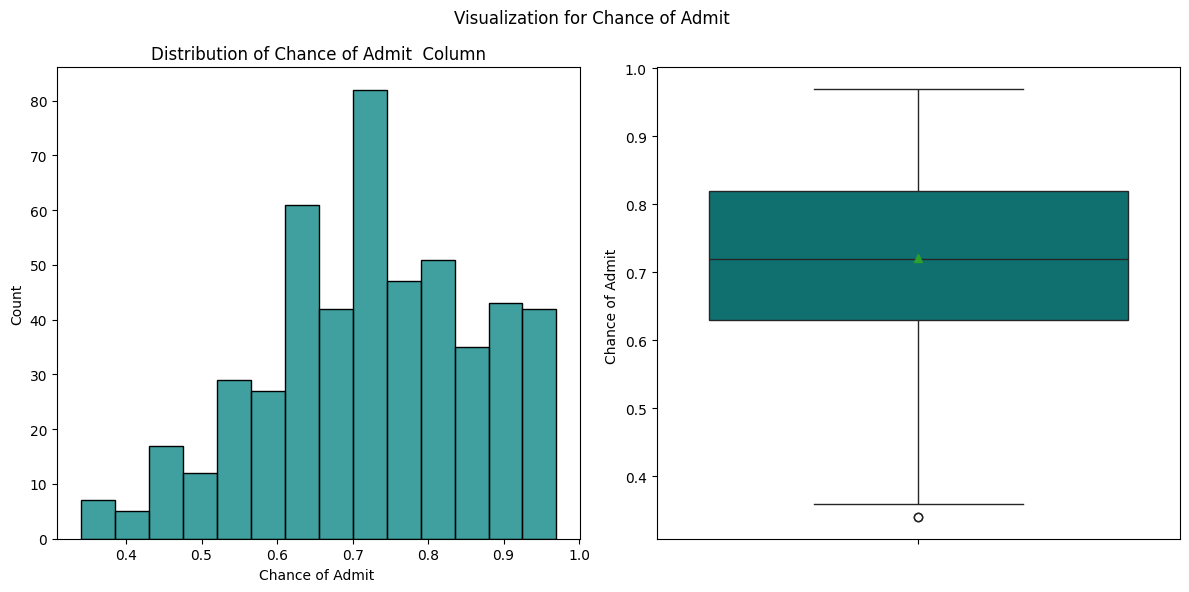

In [369]:
for i in data.columns:
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  sns.histplot(data[i],color = "teal")
  plt.title(f"Distribution of {i} Column")
  plt.subplot(1,2,2)
  sns.boxplot(data[i], color ="teal",showmeans = True)
  plt.suptitle(f"Visualization for {i}")
  plt.tight_layout()
  plt.show()



- There are outlier in LOR Column and in Chance of Admit Column

## Outlier Detection

In [370]:
for i in data.columns:
  Q1 = np.quantile(data[i],0.25)
  Q3 = np.quantile(data[i],0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + (1.5*IQR)
  lower_bound = Q1 - (1.5*IQR)
  outliers = data[(data[i]< lower_bound)| (data[i]>upper_bound)]
  print('Column Name :', i)
  print(f'25th Percentile Value : {Q1} , 75th Percentile Value : {Q3} ')
  print(f'IQR Value : {IQR}')
  print(f'Lower Bound : {round(lower_bound,2)} , Upper Bound : {round(upper_bound,2)}')
  print(f"Number of Outliers : {len(outliers)}")
  print(f"Percentage Of Outliers : {(len(outliers)/len(data[i]))*100} \n")
  print("-"*80)

Column Name : GRE Score
25th Percentile Value : 308.0 , 75th Percentile Value : 325.0 
IQR Value : 17.0
Lower Bound : 282.5 , Upper Bound : 350.5
Number of Outliers : 0
Percentage Of Outliers : 0.0 

--------------------------------------------------------------------------------
Column Name : TOEFL Score
25th Percentile Value : 103.0 , 75th Percentile Value : 112.0 
IQR Value : 9.0
Lower Bound : 89.5 , Upper Bound : 125.5
Number of Outliers : 0
Percentage Of Outliers : 0.0 

--------------------------------------------------------------------------------
Column Name : University Rating
25th Percentile Value : 2.0 , 75th Percentile Value : 4.0 
IQR Value : 2.0
Lower Bound : -1.0 , Upper Bound : 7.0
Number of Outliers : 0
Percentage Of Outliers : 0.0 

--------------------------------------------------------------------------------
Column Name : SOP
25th Percentile Value : 2.5 , 75th Percentile Value : 4.0 
IQR Value : 1.5
Lower Bound : 0.25 , Upper Bound : 6.25
Number of Outliers : 0
P

- As there are small outliers preset in the data , and data size is also small we will keep the outliers

## Bivariate Analysis

### Pair-plot

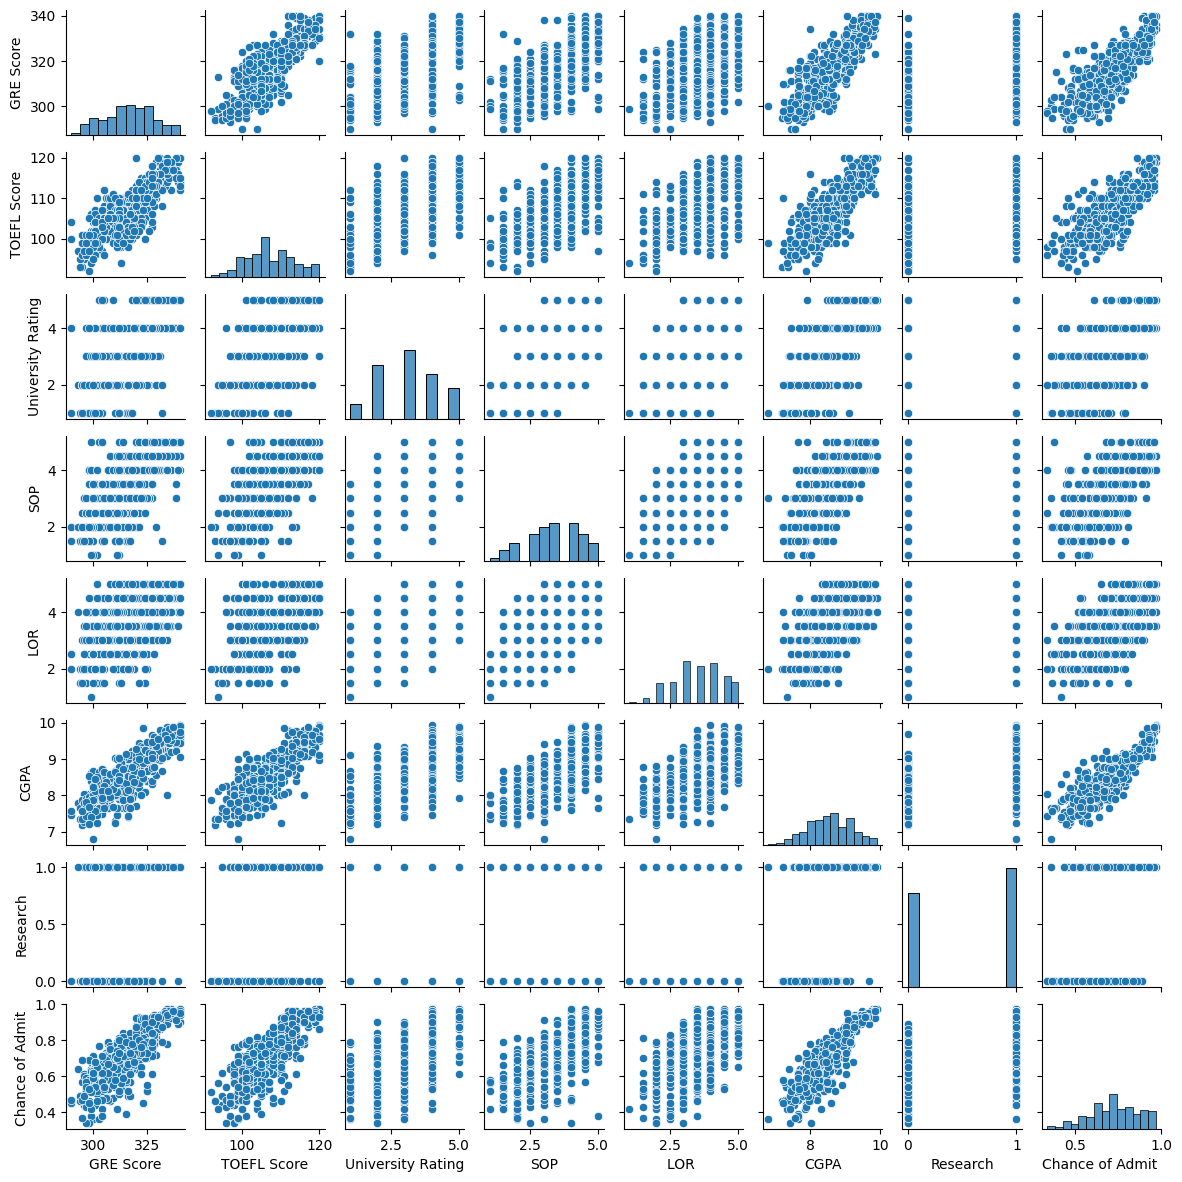

In [371]:
sns.pairplot(data,kind = "scatter",height = 1.5)
plt.show()

- Chance Of Admit have high correlation with GRE_Score , TOEFL_Score , CGPA

#Correlation

In [372]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## Heatmap

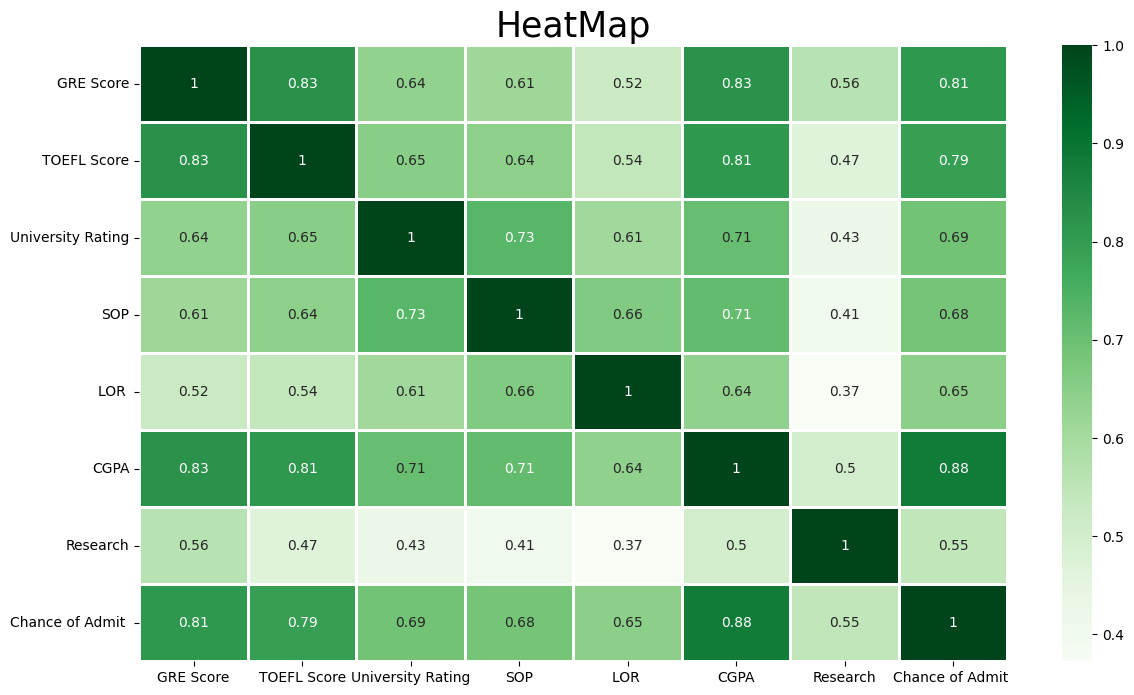

In [373]:
plt.figure(figsize= (14,8))
sns.heatmap(data.corr(), annot = True , cmap = "Greens",linewidth = 1)
plt.title("HeatMap",fontsize = 25)
plt.show()


## **Insights**
- GRE & TOEFL Scores: Both have a strong positive correlation with the chance of admit (0.81 and 0.79, respectively).
- CGPA: Strongest correlation with chance of admit (0.88), highlighting its importance for admission chances.
- University Rating & SOP: Both show moderate positive correlations with chance of admit (0.69 and 0.68), indicating their relevance.
- Research: Least correlated with chance of admit (0.55), suggesting it has a smaller impact compared to other factors.



In [374]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

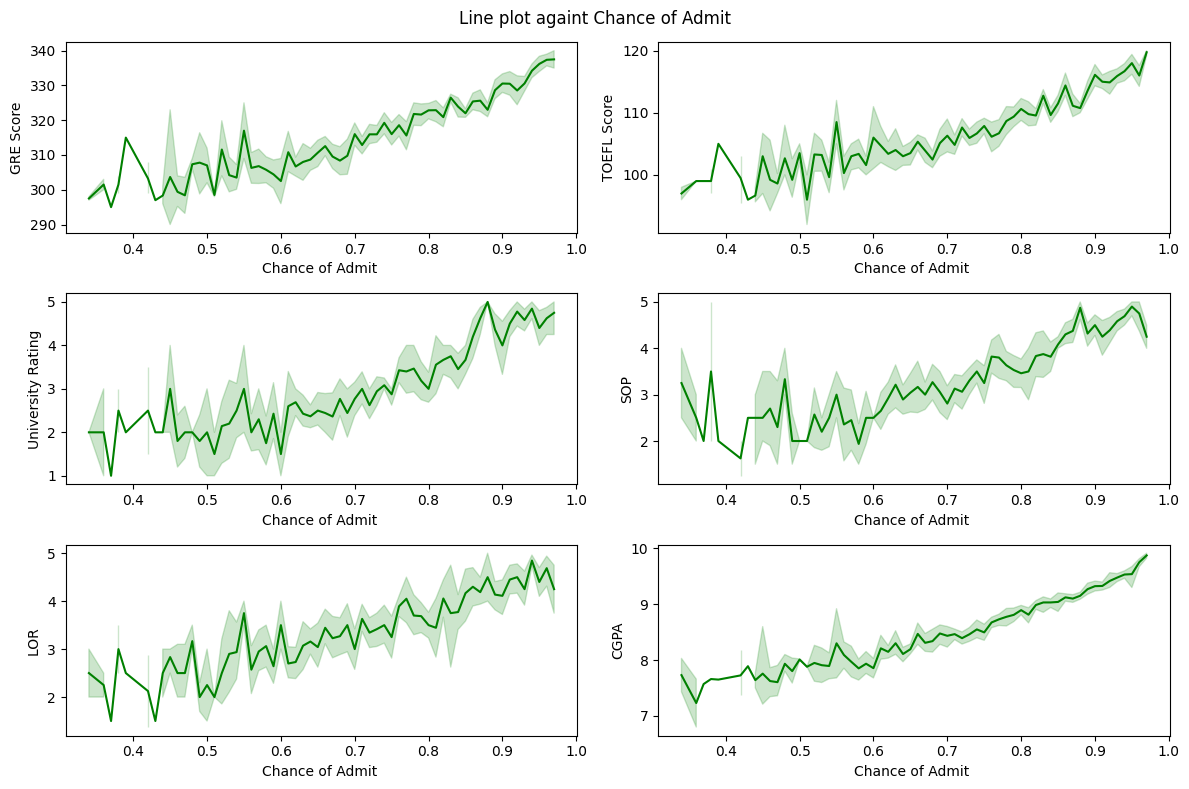

In [375]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
plt.figure(figsize = (12,8))
for j,i in enumerate(columns):
  j = j+1
  plt.subplot(3,2,j)
  sns.lineplot(x = "Chance of Admit ", y = i , data = data,color = "Green")
plt.suptitle("Line plot againt Chance of Admit")
plt.tight_layout()
plt.show()

# Data Modeling

## **Splting Data**

### Separating Target and Feature Column

In [376]:
Y_col = data["Chance of Admit "]
X_col = data.drop(columns="Chance of Admit ")


###  Spliting the data into training + validation and testing sets

In [377]:
X_train_val , X_test , y_train_val , y_test = train_test_split(X_col , Y_col , test_size = 0.2 ,random_state=2)

### Spliting the data into training and validation sets

In [378]:
X_train , X_val , y_train , y_val  = train_test_split(X_train_val , y_train_val , test_size = 0.25 , random_state = 2)

## **Scaling Data**

In [379]:
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

### Scaling training data

In [380]:
X_train = pd.DataFrame(feature_scaler.fit_transform(X_train),columns = X_train.columns)
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
X_train.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.952058,0.299085,-0.069103,0.145416,0.532527,0.323069,0.880425
1,-1.850772,-1.972449,-0.932885,-0.367817,-1.633683,-1.675129,0.880425
2,-1.941186,-1.323439,-0.932885,-0.881050,-0.550578,-1.496428,-1.135815


### Scaling validation data

In [381]:
X_val = pd.DataFrame(feature_scaler.transform(X_val),columns = X_val.columns)
y_val = target_scaler.transform(y_val.values.reshape(-1,1))
X_val.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.313714,1.434853,1.658462,1.685115,1.615631,1.314046,0.880425
1,0.590403,-0.512177,-0.069103,0.658649,0.532527,-0.213033,0.880425
2,-0.856219,-0.349925,-0.932885,-0.881050,-0.550578,-1.496428,-1.135815


### Scaling test data

In [382]:
X_test = pd.DataFrame(feature_scaler.transform(X_test),columns = X_test.columns)
y_test = target_scaler.transform(y_test.values.reshape(-1,1))
X_test.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.494541,1.759358,1.658462,1.685115,1.615631,1.265309,0.880425
1,-0.494564,-0.836682,-0.069103,1.171882,0.532527,0.111877,0.880425
2,-1.037047,-0.512177,-0.932885,-0.881050,-2.175236,-1.268991,-1.135815


## **Linear Regression**

In [383]:
lir_model = LinearRegression()
lir_model.fit(X_train,y_train)

LinearRegression()

In [384]:
lir_model.coef_

array([[ 0.18662198,  0.13828711, -0.01512607,  0.04049842,  0.13615616,
         0.48144963,  0.07430303]])

In [385]:
lir_model.intercept_

array([3.71172818e-16])

#### R2 Score Of Train Data

In [386]:
lir_model.score(X_train,y_train)

0.8384571071533284

#### R2 Score Of Validation Data

In [387]:
lir_model.score(X_val,y_val)

0.7869929436388758

#### R2 Score Of Test Data

In [388]:
lir_model.score(X_test,y_test)

0.7875107976542138

#### MSE Of Train Data

In [389]:
np.sum(( y_train - lir_model.predict(X_train))**2) / len(y_train)

0.16154289284667164

### Stats Model ( Adding Constant )

In [390]:
X_stats_model = sm.add_constant(X_train)
stats_model = sm.OLS(y_train,X_stats_model)
stats_result = stats_model.fit()
X_stats_model.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,0.952058,0.299085,-0.069103,0.145416,0.532527,0.323069,0.880425
1,1.0,-1.850772,-1.972449,-0.932885,-0.367817,-1.633683,-1.675129,0.880425
2,1.0,-1.941186,-1.323439,-0.932885,-0.881050,-0.550578,-1.496428,-1.135815
3,1.0,-0.404150,-1.161187,-1.796668,-0.367817,-0.550578,-0.066823,0.880425
4,1.0,1.223300,0.948095,1.658462,1.685115,0.532527,1.200327,0.880425


#### Stats Model Summary

In [391]:
print(stats_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.5
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.33e-111
Time:                        15:11:06   Log-Likelihood:                -152.23
No. Observations:                 300   AIC:                             320.5
Df Residuals:                     292   BIC:                             350.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.881e-16      0.02

In [392]:
#Droping SOP Column as p-value > 0.05

new_xtrain = X_stats_model.drop("SOP" , axis = 1)
new_xtrain.head()

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,0.952058,0.299085,-0.069103,0.532527,0.323069,0.880425
1,1.0,-1.850772,-1.972449,-0.932885,-1.633683,-1.675129,0.880425
2,1.0,-1.941186,-1.323439,-0.932885,-0.550578,-1.496428,-1.135815
3,1.0,-0.404150,-1.161187,-1.796668,-0.550578,-0.066823,0.880425
4,1.0,1.223300,0.948095,1.658462,0.532527,1.200327,0.880425


In [393]:
stats_model2 = sm.OLS(y_train,new_xtrain)
stats_result = stats_model2.fit()
print(stats_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     252.3
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.37e-112
Time:                        15:11:06   Log-Likelihood:                -152.79
No. Observations:                 300   AIC:                             319.6
Df Residuals:                     293   BIC:                             345.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.881e-16      0.02

- After Droping the "SOP" Column the Adj. R-squared Score didn't Change.

In [394]:
#Droping university rating as p-value > 0.05

new_xtrain2 = new_xtrain.drop("University Rating" , axis = 1)
new_xtrain2.head()

,const,GRE Score,TOEFL Score,LOR,CGPA,Research
0,1.0,0.952058,0.299085,0.532527,0.323069,0.880425
1,1.0,-1.850772,-1.972449,-1.633683,-1.675129,0.880425
2,1.0,-1.941186,-1.323439,-0.550578,-1.496428,-1.135815
3,1.0,-0.404150,-1.161187,-0.550578,-0.066823,0.880425
4,1.0,1.223300,0.948095,0.532527,1.200327,0.880425


In [395]:
stats_model2 = sm.OLS(y_train,new_xtrain2)
stats_result = stats_model2.fit()
print(stats_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     303.8
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          7.51e-114
Time:                        15:11:06   Log-Likelihood:                -152.80
No. Observations:                 300   AIC:                             317.6
Df Residuals:                     294   BIC:                             339.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.881e-16      0.023   -2.5e-14      

- After Droping the "SOP" Column the Adj. R-squared Score didn't Change.

# Assumptions of Linear Regression
?
---

###

### 1. **No Multicollinearity**
Independent variables should not be highly correlated with each other. High multicollinearity can distort the estimation of coefficients.  
**How to Test:**  
- Calculate the Variance Inflation Factor (VIF).  
**VIF Formula:**  
$$
VIF = \frac{1}{1 - R^2}
$$
Where \( R^2 \) is the coefficient of determination of the regression model predicting a feature using other features.  
- A VIF > 5 or 10 indicates high multicollinearity.

---

### 2. **Normality of Residuals & Mean of residuals close to 0**
- Mean of Residuals should be close to zero.


Residuals (errors) should follow a normal distribution. This is important for hypothesis testing and confidence intervals.  
**How to Test:**  
- Use a Q-Q plot (quantile-quantile plot).  


### 3. **Linear relationship between independent & dependent variables.**

---

### 4. **No Heteroskedasticity**
The variance of residuals should remain constant across all levels of the independent variables.  
**How to Test:**  
- Perform Goldfeld Quandt test.


## MultiCollinearity Check

#### VIF

In [396]:
vif = pd.DataFrame()
vif["Columns"] = new_xtrain2.columns
vif["VIF_SCORE"] = [variance_inflation_factor(new_xtrain2.values,i) for i in range(new_xtrain2.shape[1])]

In [397]:
vif

,Columns,VIF_SCORE
0,const,1.000000
1,GRE Score,4.092586
2,TOEFL Score,4.058964
3,LOR,1.681572
4,CGPA,4.482544
5,Research,1.430166


- Since the Variance Inflation Factor (VIF) scores for all features are below 5, we can conclude that there is minimal multicollinearity or no multicollinearity among the features.

## Residuals Mean & Normality of Residuals:

- The mean of residuals measures the average error between actual and predicted values in a regression model.
- A mean close to zero indicates balanced predictions, with no systematic overprediction or underprediction.
- If the mean deviates significantly from zero, it suggests the model may be biased or poorly calibrated.

In [398]:
stats_model2 = sm.OLS(y_train,new_xtrain2)
model_fit = stats_model2.fit()
y_predict = model_fit.predict(new_xtrain2)

#### Train Data

In [399]:
train_residuals = (y_train.reshape(-1) - y_predict.values)

train_residuals.mean()

9.814371537686384e-16

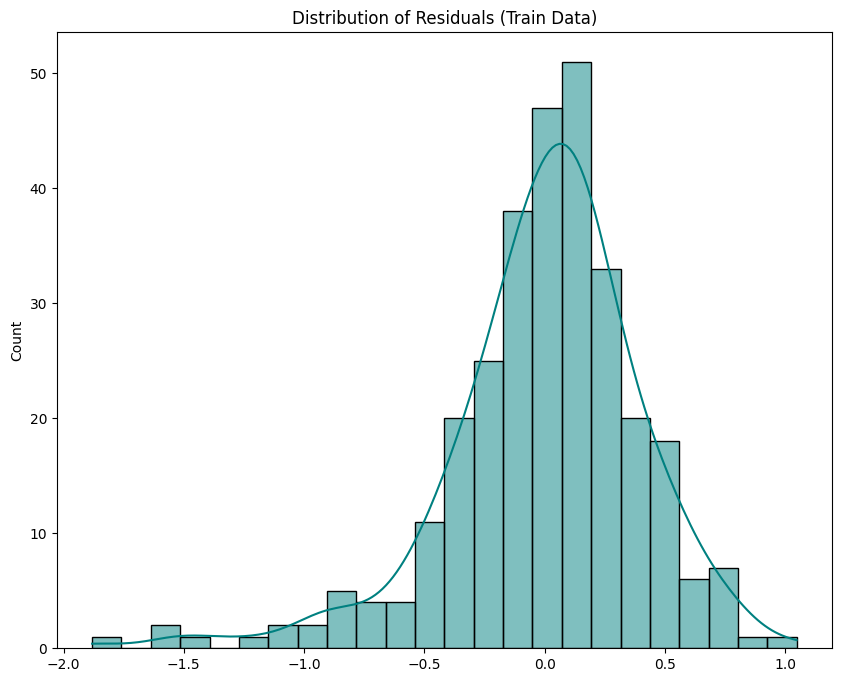

In [400]:
plt.figure(figsize=(10,8))
sns.histplot(train_residuals, kde = True , color = "teal")
plt.title("Distribution of Residuals (Train Data)")
plt.show()

#### Validation Data

In [401]:
X_val_sm = sm.add_constant(X_val)

In [402]:
y_predict_val = model_fit.predict(X_val_sm.drop(["University Rating","SOP"], axis = 1 ))

In [403]:
val_residuals = (y_val.reshape(-1) - y_predict_val.values)
val_residuals.mean()

0.023169113800557195

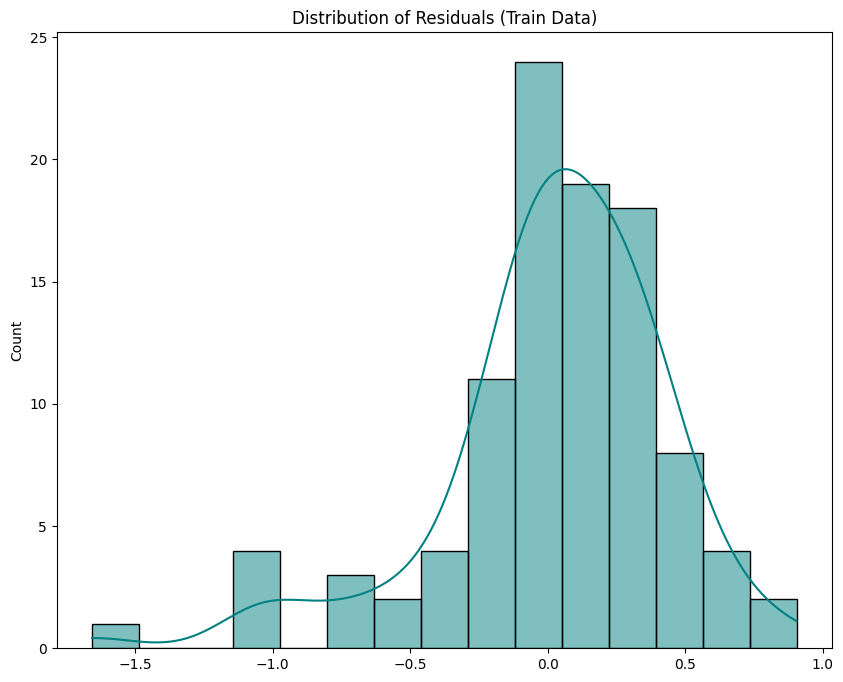

In [404]:
plt.figure(figsize=(10,8))
sns.histplot(val_residuals, kde = True , color = "teal")
plt.title("Distribution of Residuals (Train Data)")
plt.show()

#### Test Data

In [405]:
X_test_sm = sm.add_constant(X_test)
y_test_val = model_fit.predict(X_test_sm.drop(["University Rating","SOP"], axis = 1 ))
test_residuals = (y_test.reshape(-1) - y_test_val.values)
test_residuals.mean()

-0.0371393238887259

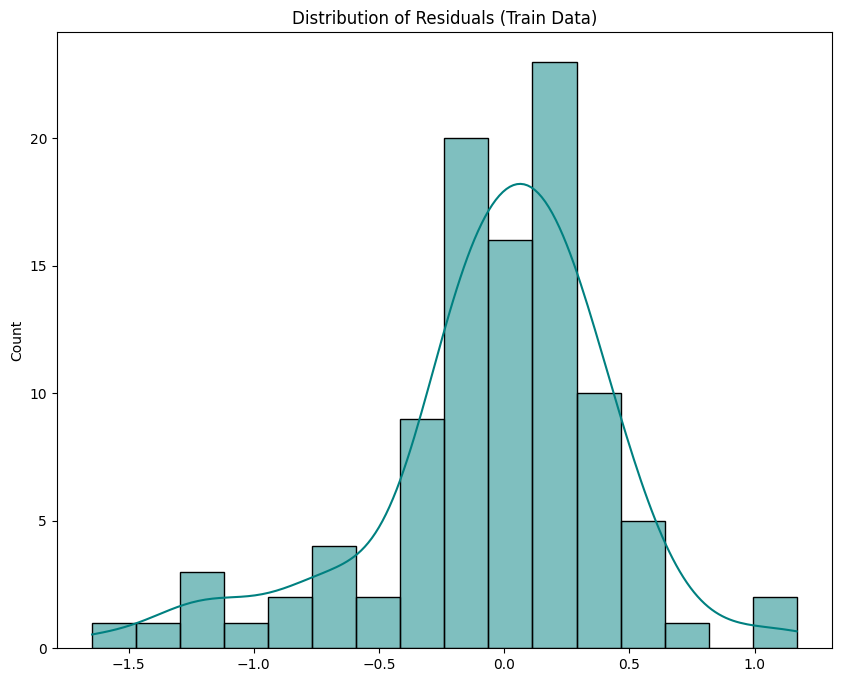

In [406]:
plt.figure(figsize=(10,8))
sns.histplot(test_residuals, kde = True , color = "teal")
plt.title("Distribution of Residuals (Train Data)")
plt.show()

## Linear relationship between independent & dependent variables.

- Linearity assumes a consistent relationship between independent variables and the dependent variable in a regression model.
- Residual plots help assess linearity; ideally, residuals should scatter randomly around zero, showing no patterns.
- Patterns like curved shapes, U-shapes, or funnel spreads suggest violations of the linearity assumption.
- Addressing these issues may involve transformations, adding polynomial terms, or exploring nonlinear models.

### Relationship Between Dependent and Independent Variable ( Regression Plot )

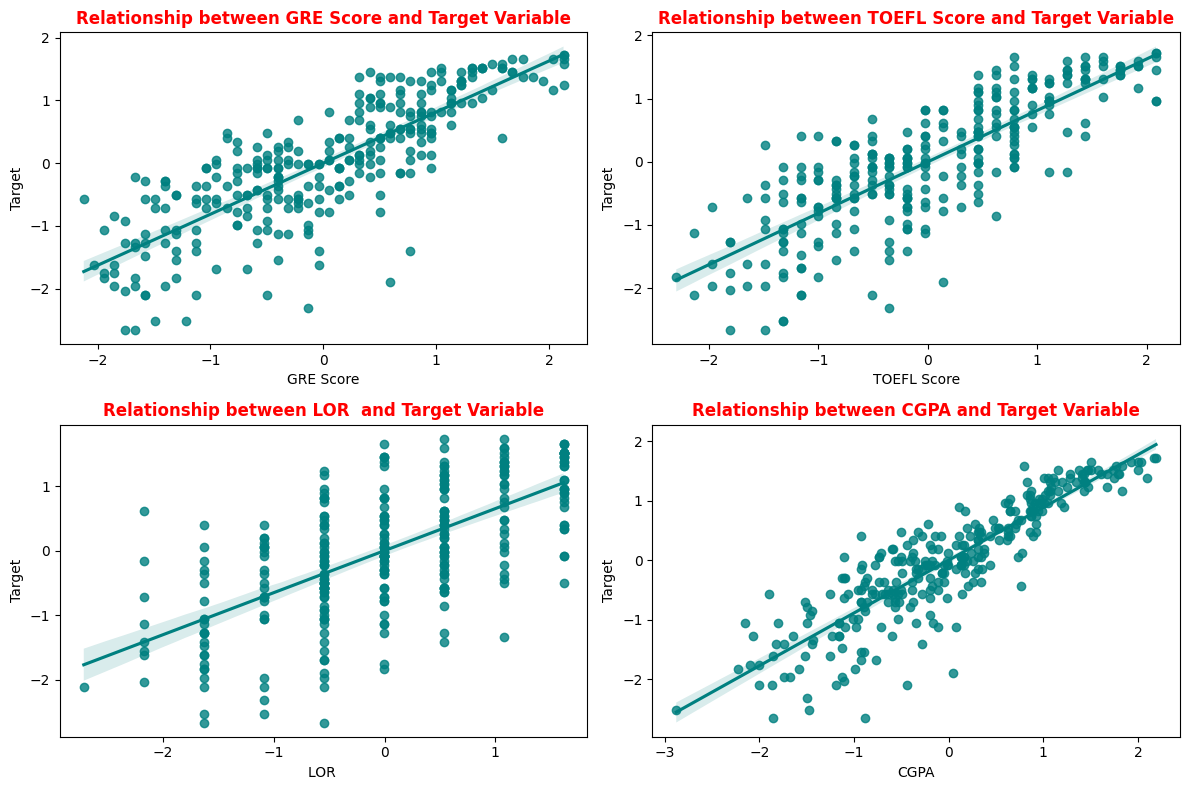

In [407]:
plt.figure(figsize=(12,8))
i = 1


for col in new_xtrain2.columns:

  if col != ("const") and col!= ("Research"):

    plt.subplot(2,2,i)
    sns.regplot(x = new_xtrain2[col] , y = y_train.reshape(-1) , color = "Teal")
    plt.tight_layout
    plt.title(f"Relationship between {col} and Target Variable",fontweight='bold',color='red')
    plt.ylabel('Target')
    i = i+1


plt.tight_layout()
plt.show()

### Pearson Correlation Check Between Independent and Dependent Variable

In [408]:
for i in new_xtrain2.columns:
  if (i != "const") :
    stat , pvalue = pearsonr(new_xtrain2[i], y_train.reshape(-1))
    if pvalue <= 0.05:
      print(f"Column {i} is Linearly correlated with the Target variable , P-Value = {pvalue}")
      print("-" * 80)
      print("\n")
    else:
      print(f"Column {i} is NOT Linearly correlated with the Target variable , P-Value = {pvalue}")
      print("-" * 80)
      print("\n")


Column GRE Score is Linearly correlated with the Target variable , P-Value = 1.2429548960829975e-72
--------------------------------------------------------------------------------


Column TOEFL Score is Linearly correlated with the Target variable , P-Value = 2.296174043966912e-72
--------------------------------------------------------------------------------


Column LOR  is Linearly correlated with the Target variable , P-Value = 1.640938235052833e-37
--------------------------------------------------------------------------------


Column CGPA is Linearly correlated with the Target variable , P-Value = 9.117753627641115e-103
--------------------------------------------------------------------------------


Column Research is Linearly correlated with the Target variable , P-Value = 4.7842884489319654e-23
--------------------------------------------------------------------------------




## No Heteroscedasticity Check

- Homoscedasticity (No Heteroscedasticity) assumes the variance of residuals is constant across all levels of independent variables.
- Violations indicate inconsistent error variability, which can lead to unreliable regression estimates.
- Residual plots, scatterplots and Goldfeld-Quandt tests are common ways to check for homoscedasticity.
- Maintaining homoscedasticity ensures accurate and efficient regression results; addressing violations may involve data transformation or model adjustments.

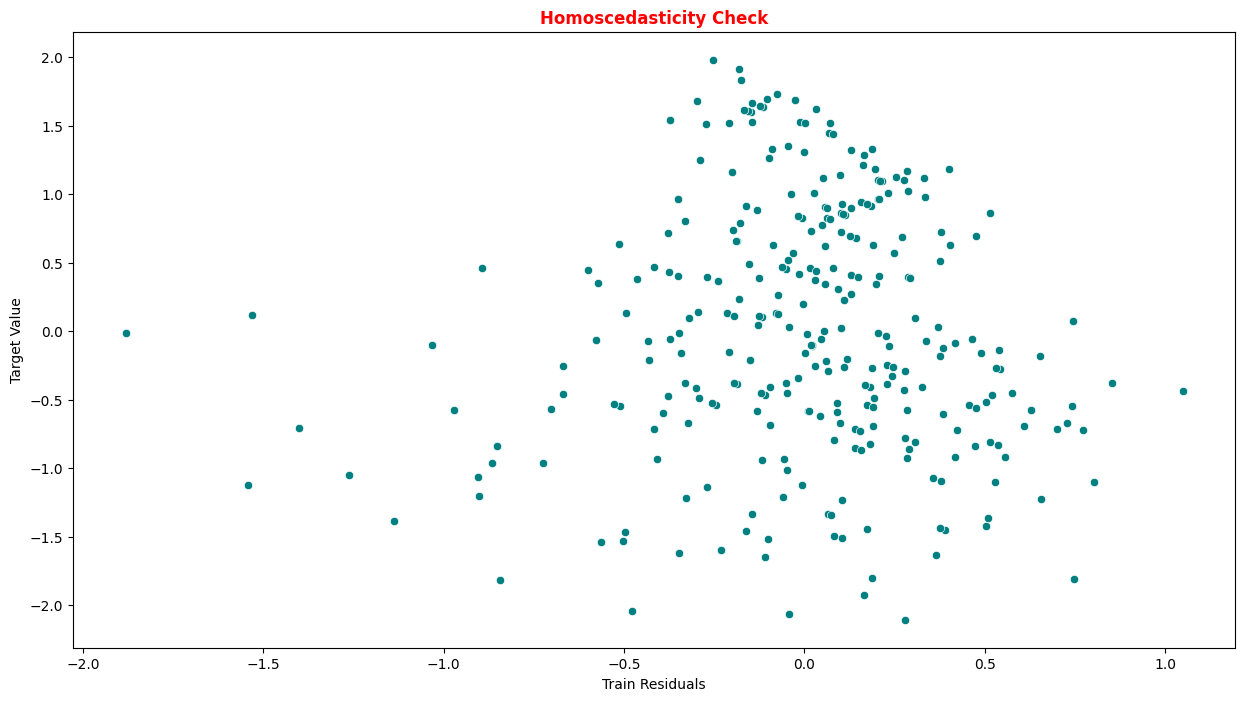

In [409]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = train_residuals , y = y_predict.values.reshape(-1) , color ="Teal"  )
plt.title("Homoscedasticity Check", fontweight='bold',color='red')
plt.xlabel("Train Residuals")
plt.ylabel('Target Value')
plt.show()

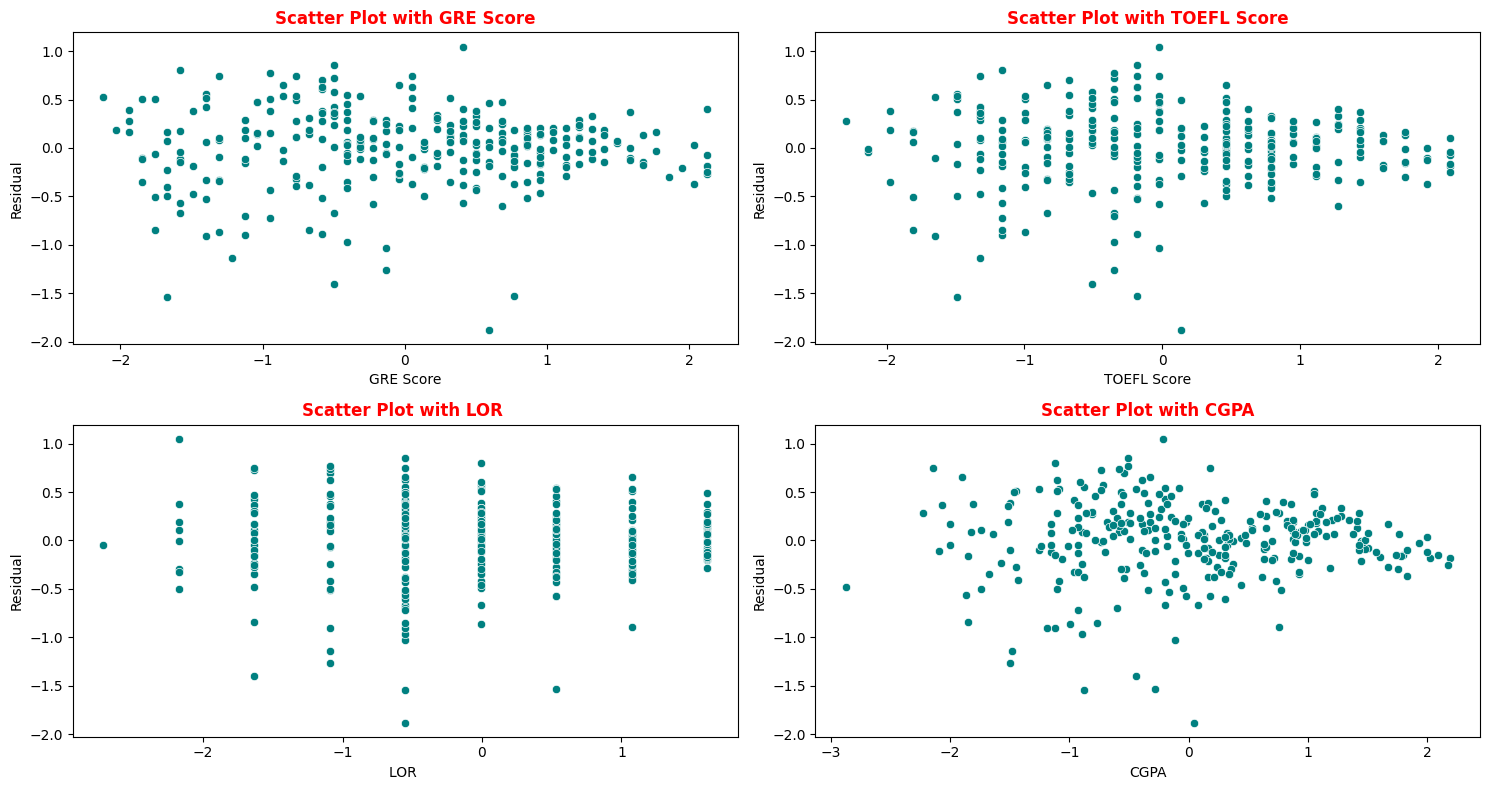

In [410]:
plt.figure(figsize=(15,8))
i=1
for col in new_xtrain2.columns:
  if col != ("const") and col!= ("Research"):
    plt.subplot(2,2,i)
    sns.scatterplot(x=new_xtrain2[col].values.reshape(-1,), y=train_residuals.reshape(-1,),color='teal')
    plt.title(f'Scatter Plot with {col}',fontweight='bold',color='red')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1

plt.tight_layout()
plt.show();

### Goldfel-Quandt Test for Homoscedasticity

- Null and Alternate Hypothesis of Goldfeld-Quandt Test

    - Null Hypothesis: Heteroscedasticity is not present.
    - Alternate Hypothesis: Heteroscedasticity is present.

In [411]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']

test = sms.het_goldfeldquandt(y_train, new_xtrain2)
lzip(name, test)

[('F statistic', 0.8326763968871295), ('p-value', 0.8634588797428864)]

- As pvalue > 0.05 We failed to reject Null Hypothesis.

**There is no strong evidence of heteroscedasticity and hence, the presence of Homoscedasticity is validated.**


## Normality of residuals
- Normality assumes that residuals in a statistical model follow a normal distribution, ensuring errors are random, unbiased, and consistent in variability.
- This assumption is critical for valid hypothesis testing, confidence intervals, and the application of certain statistical tests.
- Normality can be assessed using a residual histogram (looking for a bell-shaped curve) and a Q-Q plot (checking if points align closely with the diagonal line).

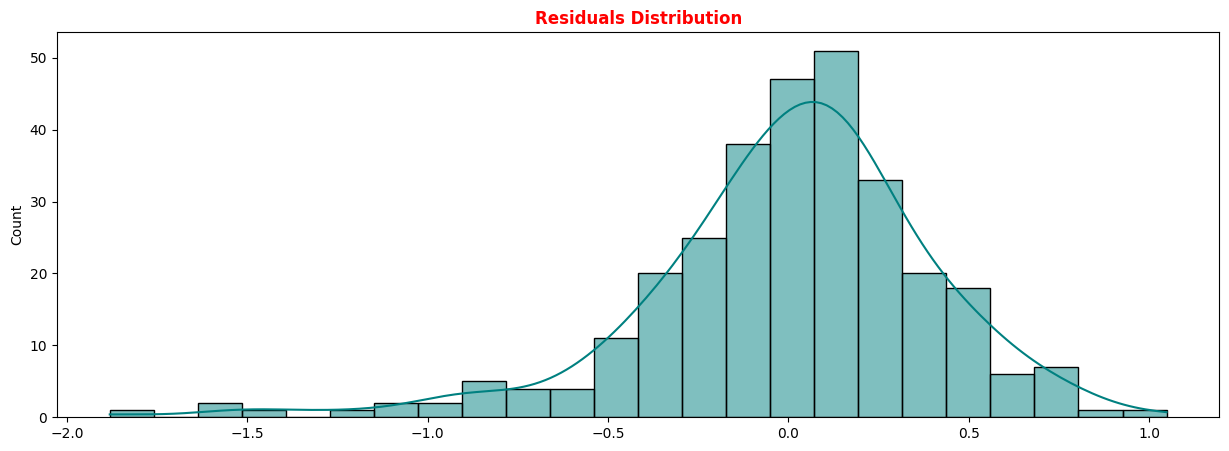

In [412]:
plt.figure(figsize=(15,5))
sns.histplot(train_residuals, kde= True,color='teal')
plt.title('Residuals Distribution',fontweight='bold',color='red')
plt.show()

<Figure size 1500x500 with 0 Axes>

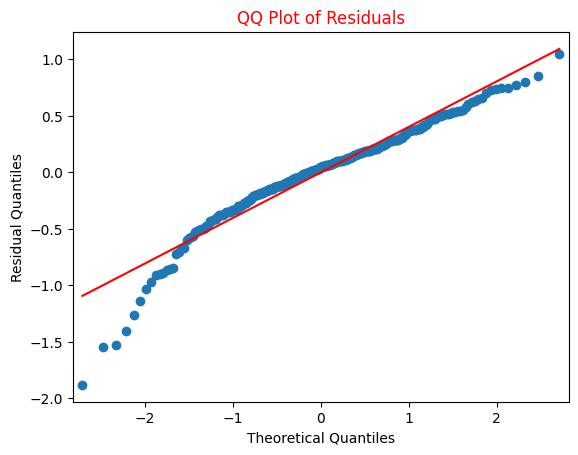

In [413]:
plt.figure(figsize=(15,5))

sm.qqplot(train_residuals,line='s')
plt.title('QQ Plot of Residuals',color='Red')
plt.ylabel('Residual Quantiles')
plt.show()

- The Residuals are a little left skewed as we can check over the Distribution

# L1 (Lasso) And L2 (Ridge) Reguralization :

- Lasso Regression: Uses L1 regularization to penalize the absolute values of coefficients, shrinking some to exactly zero, which helps with feature selection in high-dimensional datasets.
- Ridge Regression: Uses L2 regularization to penalize the squared values of coefficients, reducing the influence of less important features and addressing multicollinearity effectively.

## Lasso Regression ( L1 Reguralization )

In [414]:
x_train = new_xtrain2.drop("const", axis = 1)
lasso_m = Lasso(alpha = 0.001)
lasso_m.fit(x_train,y_train)


Lasso(alpha=0.001)

In [415]:
train_predict = lasso_m.predict(x_train) # Training data prediction on lasso model

In [416]:
new_xval = X_val.drop(["SOP" ,"University Rating"], axis = 1)
new_xtest = X_test.drop(["SOP" ,"University Rating"], axis = 1)

In [417]:
val_predict = lasso_m.predict(new_xval) # Validation data prediction on lasso model

In [418]:
test_predict = lasso_m.predict(new_xtest) # Test data prediction on lasso model

###  **Evaluate the model’s performance :**

-  MAE (Mean Absolute Error)
-  RMSE (Root Mean Square Error)
-  R2 score / R-squared value
-  Adjusted R-squared value

In [419]:
def score(y_actual, y_predicted, model):
  n = len(y_actual)
  p = model.coef_.shape[0]

  MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_predicted,squared=True),5)

  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_predicted),5)

  RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_predicted, squared=False),5)

  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_predicted),5)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),5)
  return print(f"MSE SCORE : {MSE} \nMAE SCORE : {MAE}\nRMSE SCORE : {RMSE}\nR2 Score SCORE: {r2}\nAdjusted R2 SCORE: {adj_r2}")

## Train Data Score

In [420]:
score(train_predict , y_train,lasso_m)

MSE SCORE : 0.16215 
MAE SCORE : 0.29176
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80598
Adjusted R2 SCORE: 0.80268


## Validation Data Score

In [421]:
score(val_predict ,y_val,lasso_m)

MSE SCORE : 0.16551 
MAE SCORE : 0.29171
RMSE SCORE : 0.40683
R2 Score SCORE: 0.76028
Adjusted R2 SCORE: 0.74753


# Test Data Score

In [422]:
score(test_predict ,y_test,lasso_m)

MSE SCORE : 0.21974 
MAE SCORE : 0.33393
RMSE SCORE : 0.46876
R2 Score SCORE: 0.76632
Adjusted R2 SCORE: 0.75389


## Ridge Regression (L2 Regularization)

In [423]:
ridge_m = Ridge(alpha = 1)
ridge_m.fit(x_train,y_train)

Ridge(alpha=1)

In [424]:
train_predict_ridge = ridge_m.predict(x_train) # Train data Prediction on ridge model

In [425]:
val_predict_ridge = ridge_m.predict(new_xval) # Validation data prediction on ridge model

In [426]:
test_predict_ridge = ridge_m.predict(new_xtest) # Test data prediction on ridge model

### Train Data Score on Ridge Model

In [427]:
score(train_predict_ridge , y_train,ridge_m)

MSE SCORE : 0.16215 
MAE SCORE : 0.2919
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80597
Adjusted R2 SCORE: 0.80532


### Validation Data Score On Ridge Model

In [428]:
score(val_predict_ridge , y_val,ridge_m)

MSE SCORE : 0.16566 
MAE SCORE : 0.29188
RMSE SCORE : 0.40701
R2 Score SCORE: 0.76027
Adjusted R2 SCORE: 0.75782


### Test Data Score on Ridge Model

In [429]:
score(test_predict_ridge , y_test,ridge_m)

MSE SCORE : 0.22012 
MAE SCORE : 0.33447
RMSE SCORE : 0.46917
R2 Score SCORE: 0.76602
Adjusted R2 SCORE: 0.76363


In [430]:
en_model = ElasticNet(alpha=0.0001)
en_model.fit(x_train , y_train)

ElasticNet(alpha=0.0001)

In [431]:
train_predict_els = en_model.predict(x_train) # Train data Prediction on ElasticNet model

In [432]:
test_predict_els = en_model.predict(new_xtest) # Test data Prediction on ElasticNet model

In [433]:
val_predict_els = en_model.predict(new_xval) # Validation data prediction on ElasticNet model

### Train Data Score

In [434]:
score(train_predict_els , y_train,en_model)

MSE SCORE : 0.16215 
MAE SCORE : 0.29185
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80644
Adjusted R2 SCORE: 0.80315


###  Validation Data Score

In [435]:
score(val_predict_els , y_val,en_model)

MSE SCORE : 0.16559 
MAE SCORE : 0.29177
RMSE SCORE : 0.40693
R2 Score SCORE: 0.76077
Adjusted R2 SCORE: 0.74804


### Test Data Score

In [436]:
score(test_predict_els , y_test,en_model)

MSE SCORE : 0.21994 
MAE SCORE : 0.33427
RMSE SCORE : 0.46897
R2 Score SCORE: 0.76667
Adjusted R2 SCORE: 0.75426


## LinearRegression Model Scores

In [437]:
lir_model = LinearRegression()
lir_model.fit(x_train,y_train)

LinearRegression()

###Train Data Score

In [438]:
train_lir_p = lir_model.predict(x_train)
score(train_lir_p,y_train , lir_model)

MSE SCORE : 0.16215 
MAE SCORE : 0.29185
RMSE SCORE : 0.40268
R2 Score SCORE: 0.80647
Adjusted R2 SCORE: 0.80582


### Validation Data Score

In [439]:
val_lir_p = lir_model.predict(new_xval)
score(val_lir_p,y_val , lir_model)

MSE SCORE : 0.16559 
MAE SCORE : 0.29177
RMSE SCORE : 0.40693
R2 Score SCORE: 0.76081
Adjusted R2 SCORE: 0.75837


### Test Data Score

In [440]:
test_lir_p = lir_model.predict(new_xtest)
score(test_lir_p,y_test , lir_model)

MSE SCORE : 0.21994 
MAE SCORE : 0.33428
RMSE SCORE : 0.46898
R2 Score SCORE: 0.7667
Adjusted R2 SCORE: 0.76432


# Insights:

- Key predictors of admission chances include GRE score, TOEFL score, and CGPA, which were identified as the most significant factors influencing the outcome.
- Multicollinearity analysis confirmed the model's stability, as no significant issues were detected despite strong correlations among predictors.
- Both Lasso Regression and Ridge Regression performed well, explaining up to 82% of the variance in admission probabilities.
- Exploratory Data Analysis revealed left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.


# Recommendations:

- Students should prioritize improving their GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors have the most significant impact on admissions.
- Expand data collection to include non-academic metrics such as extracurricular activities, personal statements, and diversity factors to create a more comprehensive applicant profile.
- Incorporate additional features like research experience, internships, or work history to enrich the predictive model and improve its performance.

